## This is a demo of `how to read the hdf5 file` and describe the data structure of our file. 
---

### Import Package
Import `h5py` to read hdf5 in python.

In [1]:
import h5py 

### Input data by `h5py`
Using `h5py` package can help you to parse the hdf5 file.

In [2]:
f = h5py.File('../output/event_record_pptt_10k_atlas.h5','r') 

### Dig into data structure
To see how many groups defined in the hdf5 file, you can use the following script.

In [3]:
f.keys()

<KeysViewHDF5 ['N_match_top_in_event', 'jet_barcode', 'jet_btag', 'jet_eta', 'jet_mass', 'jet_parton_index', 'jet_phi', 'jet_pt', 'parton_barcode', 'parton_eta', 'parton_jet_index', 'parton_mass', 'parton_pdgid', 'parton_phi', 'parton_pt']>

The output upon shows that we have 14 groups of data, contains the properties of `jet` and `parton`.
We can input the data by the following method.

In [4]:
jet_pt = f['jet_pt']
jet_phi = f['jet_phi']
jet_eta = f['jet_eta']
jet_barcode = f['jet_barcode']
jet_mass = f['jet_mass']
jet_btag = f['jet_btag']
jet_parton_index = f['jet_parton_index']

parton_pdgid = f['parton_pdgid']
parton_pt = f['parton_pt']
parton_eta = f['parton_eta']
parton_phi = f['parton_phi']
parton_mass = f['parton_mass']
parton_barcode = f['parton_barcode']
parton_jet_index = f['parton_jet_index']

N_match_top_in_event = f['N_match_top_in_event']

In [5]:
N_match_top_in_event[0]

1.0

### introduction of groups

* (mass, pt, eta, phi) in `jet` and `parton` represent the kinematics properties of jet and parton.
* `barcode` is defined to represent the relation between each parton candidate and jet.
* `parton_jet_index` and `jet_parton_index` is to point out which jet/parton is matched to(by using min dR(parton. jet))
* `btag` is the binary record, shows whether a jet has been tagged as `b jet` or not.

### Example
To check how many events in this hdf5 file.


In [6]:
parton_pt[0][1]

74.0

In [7]:
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
W_plus_inv = []
W_minus_inv = []

tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:
        pt_1 = parton_pt[i][1]
        pt_2 = parton_pt[i][2]

        eta_1 = parton_eta[i][1]
        eta_2 = parton_eta[i][2]

        phi_1 = parton_phi[i][1]
        phi_2 = parton_phi[i][2]

        tmp = np.sqrt( 2*parton_pt[i][1]*parton_pt[i][2]*( np.cosh( parton_eta[i][1] - parton_eta[i][2] ) - np.cos( parton_phi[i][1] - parton_phi[i][2] ) ) )

        pt_3 = parton_pt[i][4]
        pt_4 = parton_pt[i][5]

        eta_3 = parton_eta[i][4]
        eta_4 = parton_eta[i][5]

        phi_3 = parton_phi[i][4]
        phi_4 = parton_phi[i][5]

        tmp_p = np.sqrt( 2*pt_3*pt_4*( np.cosh( eta_3 - eta_4 ) - np.cos( phi_3 - phi_4 ) ) )

        W_plus_inv.append(tmp)
        W_minus_inv.append(tmp_p)


In [9]:
def plot_hist_W(target, x_label):
    plt.figure(figsize=(8,6))
    height, width = np.histogram(target, bins=100, range=(0,200) )
    maxi =  height.max()
    idxx = np.where( height == maxi ) 
    legend = idxx[0].max()
    plt.hist(target, bins = 100 ,histtype='step', range=(0,200), label='Mass peak: {0:.2f} GeV'.format( width[legend] ))
    plt.xlabel(x_label)
    plt.ylabel(r'$\frac{dN}{dm}$')
    plt.legend(loc='upper right')
    plt.show()

def plot_hist_top(target, x_label):
    plt.figure(figsize=(8,6))
    height, width = np.histogram(target, bins=100, range=(0,300) )
    maxi =  height.max()
    idxx = np.where( height == maxi ) 
    legend = idxx[0].max()
    plt.hist(target, bins = 100 ,histtype='step', range=(0,300), label='Mass peak: {0:.2f} GeV'.format( width[legend] ))
    plt.xlabel(x_label)
    plt.ylabel(r'$\frac{dN}{dm}$')
    plt.legend(loc='upper right')
    plt.show()

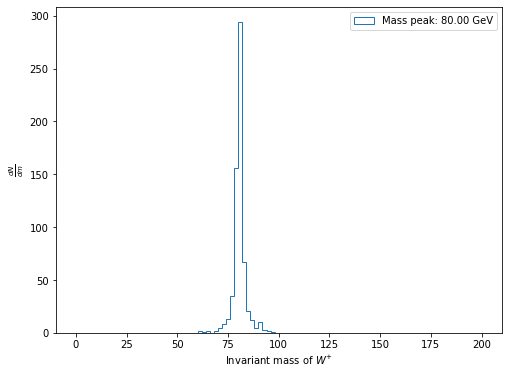

In [10]:
plot_hist_W(W_plus_inv, r'Invariant mass of $W^{+}$')

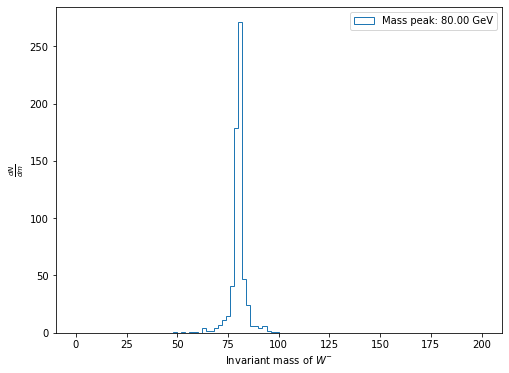

In [11]:
plot_hist_W(W_minus_inv, r'Invariant mass of $W^{-}$')

In [12]:
top_inv = []
top_bar_inv = []
tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:

        pt_1 = parton_pt[i][0]
        pt_2 = parton_pt[i][1]
        pt_3 = parton_pt[i][2]

        px_1 = pt_1 * np.cos(parton_phi[i][0])
        px_2 = pt_2 * np.cos(parton_phi[i][1])
        px_3 = pt_3 * np.cos(parton_phi[i][2])

        py_1 = pt_1 * np.sin(parton_phi[i][0])
        py_2 = pt_2 * np.sin(parton_phi[i][1])
        py_3 = pt_3 * np.sin(parton_phi[i][2])

        pz_1 = pt_1 * np.sinh(parton_eta[i][0])
        pz_2 = pt_2 * np.sinh(parton_eta[i][1])
        pz_3 = pt_3 * np.sinh(parton_eta[i][2])

        e_1 = np.sqrt( (px_1**2 + py_1**2 + pz_1**2 ) + parton_mass[i][0]**2 )
        e_2 = np.sqrt( (px_2**2 + py_2**2 + pz_2**2 ) + parton_mass[i][1]**2 )
        e_3 = np.sqrt( (px_3**2 + py_3**2 + pz_3**2 ) + parton_mass[i][2]**2 )


        tmp = np.sqrt( (e_1 + e_2 + e_3)**2 - (px_1 + px_2 + px_3)**2 - (py_1 + py_2 + py_3)**2 - (pz_1 + pz_2 + pz_3)**2  )        
        top_inv.append(tmp)


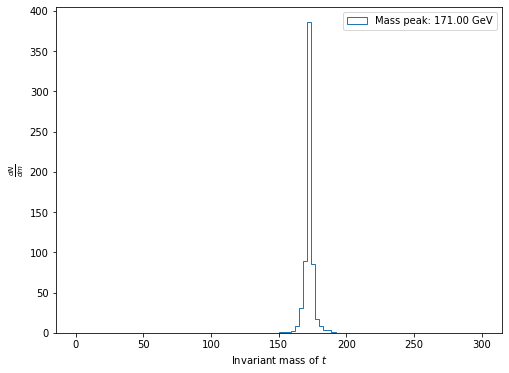

In [13]:
plot_hist_top(top_inv, r'Invariant mass of $t$')

In [14]:
for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:

        pt_3 = parton_pt[i][3]
        pt_4 = parton_pt[i][4]
        pt_5 = parton_pt[i][5]

        px_3 = pt_3 * np.cos(parton_phi[i][3])
        px_4 = pt_4 * np.cos(parton_phi[i][4])
        px_5 = pt_5 * np.cos(parton_phi[i][5])

        py_3 = pt_3 * np.sin(parton_phi[i][3])
        py_4 = pt_4 * np.sin(parton_phi[i][4])
        py_5 = pt_5 * np.sin(parton_phi[i][5])

        pz_3 = pt_3 * np.sinh(parton_eta[i][3])
        pz_4 = pt_4 * np.sinh(parton_eta[i][4])
        pz_5 = pt_5 * np.sinh(parton_eta[i][5])

        e_3 = np.sqrt( (px_3**2 + py_3**2 + pz_3**2 ) + parton_mass[i][3]**2 )
        e_4 = np.sqrt( (px_4**2 + py_4**2 + pz_4**2 ) + parton_mass[i][4]**2 )
        e_5 = np.sqrt( (px_5**2 + py_5**2 + pz_5**2 ) + parton_mass[i][5]**2 )

        tmp_p = np.sqrt( (e_3 + e_4 + e_5)**2 - (px_3 + px_4 + px_5)**2 - (py_3 + py_4 + py_5)**2 - (pz_3 + pz_4 + pz_5)**2  )
        
        top_bar_inv.append(tmp_p)

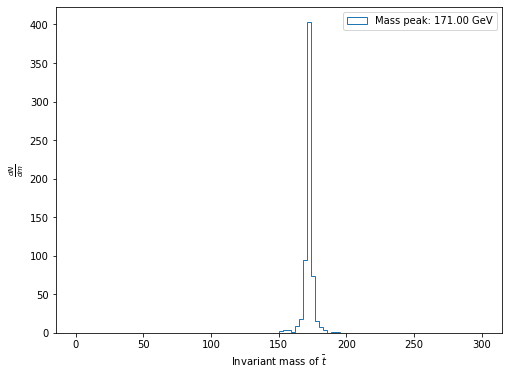

In [15]:
plot_hist_top(top_bar_inv, r'Invariant mass of $\bar{t}$')

In [16]:
W_plus_inv_jet = []
W_minus_inv_jet = []

tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:
        for j in range(len(jet_pt[i])):
            if jet_parton_index[i][j] == 1:
                jet_idx = int(parton_jet_index[i][j])
                pt_1 = jet_pt[i][jet_idx]
                eta_1 = jet_eta[i][jet_idx]
                phi_1 = jet_phi[i][jet_idx]
                mass_1 = jet_mass[i][jet_idx]
                px_1 = pt_1*np.cos( phi_1 )
                py_1 = pt_1*np.sin( phi_1 )
                pz_1 = pt_1*np.sinh( eta_1 )
                e_1 = np.sqrt( (px_1**2 + py_1**2 + pz_1**2 ) + mass_1**2 ) 
                #print("W daughter 1:", j, pt_1, eta_1, phi_1, px_1, py_1, pz_1, e_1)

            if jet_parton_index[i][j] == 2:
                jet_idx = int(parton_jet_index[i][j])
                pt_2 = jet_pt[i][jet_idx]
                eta_2 = jet_eta[i][jet_idx]
                phi_2 = jet_phi[i][jet_idx]
                mass_2 = jet_mass[i][jet_idx]
                px_2 = pt_2*np.cos( phi_2 )
                py_2 = pt_2*np.sin( phi_2 )
                pz_2 = pt_2*np.sinh( eta_2 )
                e_2 = np.sqrt( (px_2**2 + py_2**2 + pz_2**2 ) + mass_2**2 )
                #print("W daughter 2:", j, pt_2, eta_2, phi_2, px_2, py_2, pz_2, e_2)

            if jet_parton_index[i][j] == 4:
                jet_idx = int(parton_jet_index[i][j])
                pt_4 = jet_pt[i][jet_idx]
                eta_4 = jet_eta[i][jet_idx]
                phi_4 = jet_phi[i][jet_idx]
                mass_4 = jet_mass[i][jet_idx]
                px_4 = pt_4*np.cos( phi_4 )
                py_4 = pt_4*np.sin( phi_4 )
                pz_4 = pt_4*np.sinh( eta_4 )
                e_4 = np.sqrt( (px_4**2 + py_4**2 + pz_4**2 ) + mass_4**2 )
                #print("W- daughter 1:", j, pt_4, eta_4, phi_4, px_4, py_4, pz_4, e_4)

            if jet_parton_index[i][j] == 5:
                jet_idx = int(parton_jet_index[i][j])
                pt_5 = jet_pt[i][jet_idx]
                eta_5 = jet_eta[i][jet_idx]
                phi_5 = jet_phi[i][jet_idx]
                mass_5 = jet_mass[i][jet_idx]
                px_5 = pt_5*np.cos( phi_5 )
                py_5 = pt_5*np.sin( phi_5 )
                pz_5 = pt_5*np.sinh( eta_5 )
                e_5 = np.sqrt( (px_5**2 + py_5**2 + pz_5**2 ) + mass_5**2 )
                #print("W- daughter 2:", j, pt_5, eta_5, phi_5, px_5, py_5, pz_5, e_5)

            tmp = np.sqrt( ( e_1 + e_2 )**2 - ( px_1 + px_2 )**2 - ( py_1 + py_2 )**2 - ( pz_1 + pz_2 )**2 )
            tmp_p = np.sqrt( ( e_4 + e_5 )**2 - ( px_4 + px_5)**2 - ( py_4 + py_5 )**2 - ( pz_4 + pz_5 )**2 )

            W_plus_inv_jet.append(tmp)
            W_minus_inv_jet.append(tmp_p)


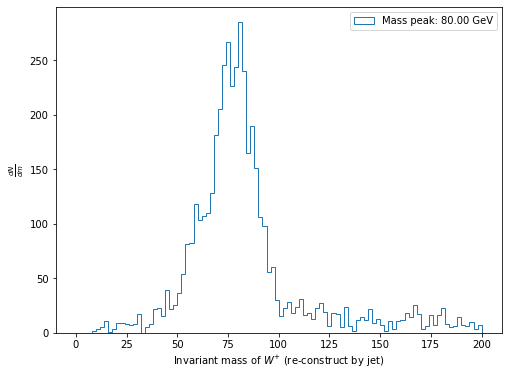

In [22]:
plot_hist_W(W_plus_inv_jet, r'Invariant mass of $W^{+}$ (re-construct by jet)')

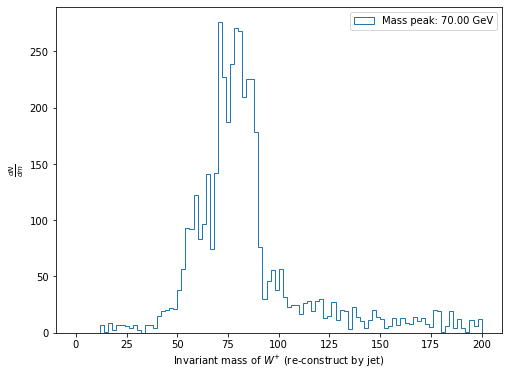

In [23]:
plot_hist_W(W_minus_inv_jet, r'Invariant mass of $W^{+}$ (re-construct by jet)')

In [19]:
t_inv_jet = []
t_bar_inv_jet = []

tmp = 0
tmp_p = 0

for i in range(len(N_match_top_in_event)):
    if N_match_top_in_event[i] == 2:
        for j in range(len(jet_parton_index[i])):
            
            if jet_parton_index[i][j] == 0:
                jet_idx = int(parton_jet_index[i][j])
                pt_0 = jet_pt[i][jet_idx]
                eta_0 = jet_eta[i][jet_idx]
                phi_0 = jet_phi[i][jet_idx]
                mass_0 = jet_mass[i][jet_idx]
                px_0 = pt_0*np.cos( phi_0 )
                py_0 = pt_0*np.sin( phi_0 )
                pz_0 = pt_0*np.sinh( eta_0 )
                e_0 = np.sqrt( (px_0**2 + py_0**2 + pz_0**2 ) + mass_0**2 ) 
                #print("b cand:", j, pt_0, eta_0, phi_0, px_0, py_0, pz_0, e_0)

            if jet_parton_index[i][j] == 1:
                jet_idx = int(parton_jet_index[i][j])
                pt_1 = jet_pt[i][jet_idx]
                eta_1 = jet_eta[i][jet_idx]
                phi_1 = jet_phi[i][jet_idx]
                mass_1 = jet_mass[i][jet_idx]
                px_1 = pt_1*np.cos( phi_1 )
                py_1 = pt_1*np.sin( phi_1 )
                pz_1 = pt_1*np.sinh( eta_1 )
                e_1 = np.sqrt( (px_1**2 + py_1**2 + pz_1**2 ) + mass_1**2 ) 
                #print("W daughter 1:", j, pt_1, eta_1, phi_1, px_1, py_1, pz_1, e_1)

            if jet_parton_index[i][j] == 2:
                jet_idx = int(parton_jet_index[i][j])
                pt_2 = jet_pt[i][jet_idx]
                eta_2 = jet_eta[i][jet_idx]
                phi_2 = jet_phi[i][jet_idx]
                mass_2 = jet_mass[i][jet_idx]
                px_2 = pt_2*np.cos( phi_2 )
                py_2 = pt_2*np.sin( phi_2 )
                pz_2 = pt_2*np.sinh( eta_2 )
                e_2 = np.sqrt( (px_2**2 + py_2**2 + pz_2**2 ) + mass_2**2 )
                #print("W daughter 2:", j, pt_2, eta_2, phi_2, px_2, py_2, pz_2, e_2)

            if jet_parton_index[i][j] == 3:
                jet_idx = int(parton_jet_index[i][j])
                pt_3 = jet_pt[i][jet_idx]
                eta_3 = jet_eta[i][jet_idx]
                phi_3 = jet_phi[i][jet_idx]
                mass_3 = jet_mass[i][jet_idx]
                px_3 = pt_3*np.cos( phi_3 )
                py_3 = pt_3*np.sin( phi_3 )
                pz_3 = pt_3*np.sinh( eta_3 )
                e_3 = np.sqrt( (px_3**2 + py_3**2 + pz_3**2 ) + mass_3**2 )
                #print("b bar cand:", j, pt_3, eta_3, phi_3, px_3, py_3, pz_3, e_3)

            if jet_parton_index[i][j] == 4:
                jet_idx = int(parton_jet_index[i][j])
                pt_4 = jet_pt[i][jet_idx]
                eta_4 = jet_eta[i][jet_idx]
                phi_4 = jet_phi[i][jet_idx]
                mass_4 = jet_mass[i][jet_idx]
                px_4 = pt_4*np.cos( phi_4 )
                py_4 = pt_4*np.sin( phi_4 )
                pz_4 = pt_4*np.sinh( eta_4 )
                e_4 = np.sqrt( (px_4**2 + py_4**2 + pz_4**2 ) + mass_4**2 )
                #print("W- daughter 1:", j, pt_4, eta_4, phi_4, px_4, py_4, pz_4, e_4)

            if jet_parton_index[i][j] == 5:
                jet_idx = int(parton_jet_index[i][j])
                pt_5 = jet_pt[i][jet_idx]
                eta_5 = jet_eta[i][jet_idx]
                phi_5 = jet_phi[i][jet_idx]
                mass_5 = jet_mass[i][jet_idx]
                px_5 = pt_5*np.cos( phi_5 )
                py_5 = pt_5*np.sin( phi_5 )
                pz_5 = pt_5*np.sinh( eta_5 )
                e_5 = np.sqrt( (px_5**2 + py_5**2 + pz_5**2 ) + mass_5**2 )
                #print("W- daughter 2:", j, pt_5, eta_5, phi_5, px_5, py_5, pz_5, e_5)

        tmp = np.sqrt( (e_0 + e_1 + e_2)**2 - (px_0 + px_1 + px_2)**2 - (py_0 + py_1 + py_2)**2 - (pz_0 + pz_1 + pz_2)**2 )
        tmp_p = np.sqrt( (e_3 + e_4 + e_5)**2 - (px_3 + px_4 + px_5)**2 - (py_3 + py_4 + py_5)**2 - (pz_3 + pz_4 + pz_5)**2 )
        t_inv_jet.append(tmp)
        t_bar_inv_jet.append(tmp_p)


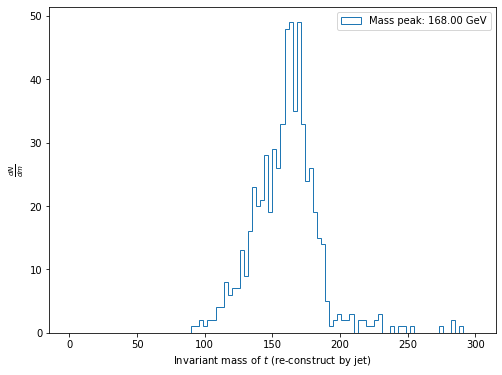

In [24]:
plot_hist_top(t_inv_jet, r'Invariant mass of $t$ (re-construct by jet)')

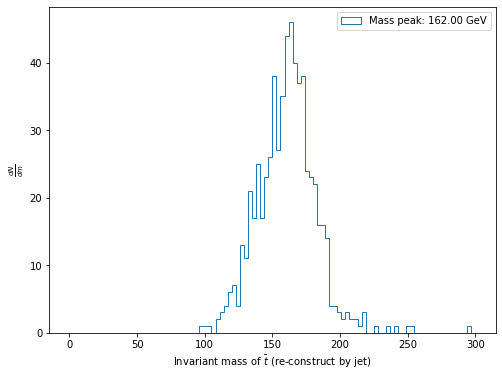

In [25]:
plot_hist_top(t_bar_inv_jet, r'Invariant mass of $\bar{t}$ (re-construct by jet)')